<a href="https://colab.research.google.com/github/singhsourav0/DeepLearningOdyssey/blob/main/Mnist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="red">MultiClass Classification on the Mnist DataSet.</font></h1>

<font color="blue"> In this notebook we will apply the ANN to demostrate the concept of feedforward Neural Network on the MNIST dataset which contains 70,000 image of hand written digits in the 28×28 pixels.</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

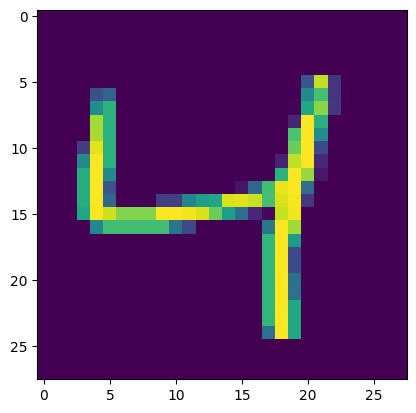

In [8]:
plt.imshow(x_train[2])

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()

In [25]:
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(10,activation='softmax'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                3

In [29]:
# prompt: Unknown loss function: 'sparse_categorical_crossentrophy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])
history =model.fit(x_train,y_train, epochs =10, validation_split =0.2)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1488 - accuracy: 0.9826 - val_loss: 0.1685 - val_accuracy: 0.9712
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0274 - accuracy: 0.9945 - val_loss: 0.2001 - val_accuracy: 0.9668
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9938 - val_loss: 0.1606 - val_accuracy: 0.9728
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0260 - accuracy: 0.9950 - val_loss: 0.1584 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9943 - val_loss: 0.1730 - val_accuracy: 0.9711
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0243 - accuracy: 0.9949 - val_loss: 0.1720 - val_accuracy: 0.9707
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0256 - accuracy: 0.9948 - val_loss: 0.1561 - val_accuracy

In [30]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
y_pred= y_prob.argmax(axis =1)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9759

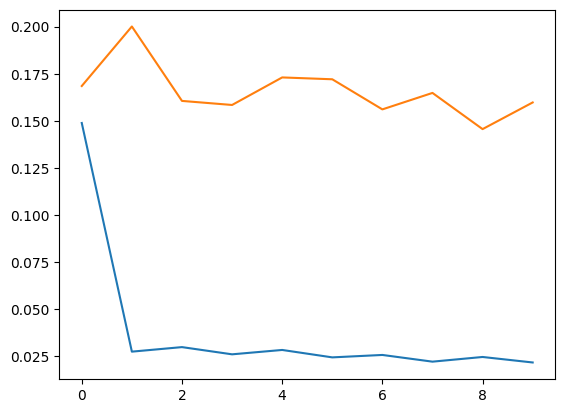

In [33]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])

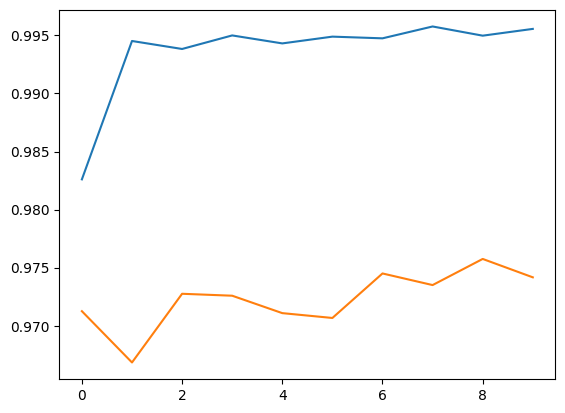

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])